# TP boosting
## les données: MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("nb of x train samples",len(x_train))
print("nb of y train samples",len(y_train))
print("nb of x test samples",len(x_test))
print("nb of y test samples",len(y_test))

# affichez le nombre de données de test
#     ....
# affichez les 100 premiers labels de train
print(y_train[:100])

print(y_test[:100])

import matplotlib.pyplot as plt
print(x_test.shape)

#for i in range(10):
 #   image=x_train[i]
  #  plt.imshow(image)
   # plt.show()


nb of x train samples 60000
nb of y train samples 60000
nb of x test samples 10000
nb of y test samples 10000
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
(10000, 28, 28)


Pour la classification binaire, on va choisir 2 classes de chiffres parmi les 10 classes de MNIST. Dans l'exmple ci-dessous, on va choisir les classes 4 et 8.

In [3]:
#quelques imports pour la suite
import numpy as np
from sklearn.utils import shuffle


(11693, 28, 28) (11693,)


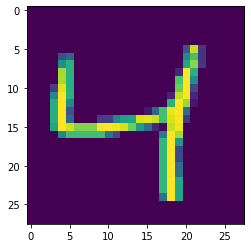

1


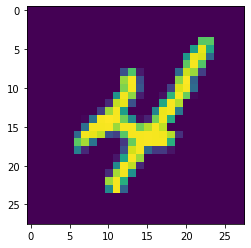

1


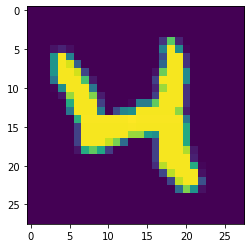

1


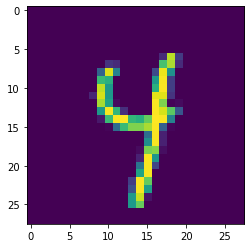

1


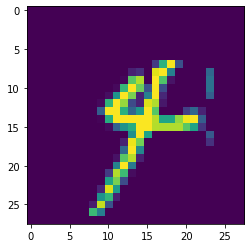

1


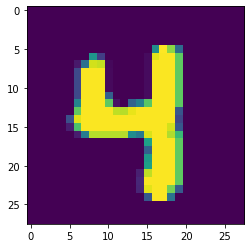

1


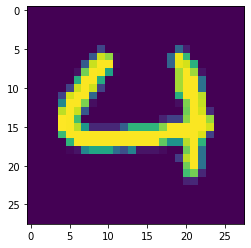

1


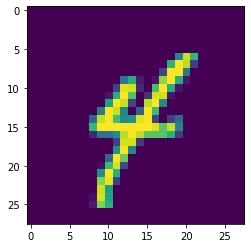

1


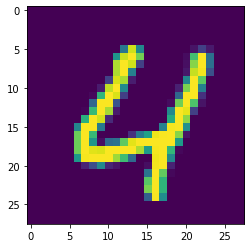

1


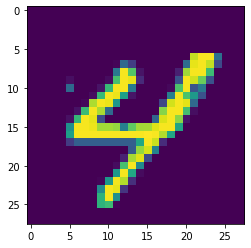

1


In [20]:
# classe des '4'
x_train4 = x_train[y_train==4,:]
# classe des '8'
x_train8 = x_train[y_train==8,:]

# et on regroupe
x_trainBinaire = np.append(x_train4,x_train8,axis=0)
# en choisissant la classe '4' comme négative et la classe '8' comme positive
y_trainBinaire = np.append(np.full(len(x_train4),-1), np.full(len(x_train8),1))

#si vous souhaitez connaitre les dimensions obtenues
print(x_trainBinaire.shape, y_trainBinaire.shape)

for i in range(10):
    image=x_train4[i]
    plt.imshow(image)
    image=x_trainBinaire[i]
    plt.imshow(image)
    plt.show()
    print(y_trainBinaire[i])

#comme on a construit en séparant les classes, on mélange mais de la même façon pour x et y!
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)

In [11]:
print(x_train.shape, y_train.shape)
print(x_train4.shape, x_train8.shape)
print(x_trainBinaire.shape, y_trainBinaire.shape)
print(x_test.shape, y_test.shape)

for i in range(10):
    image=x_train4[i]
    plt.imshow(image)
    image=x_trainBinaire[i]
    plt.imshow(image)
    plt.show()
    print(y_trainBinaire[i])


(60000, 28, 28) (60000,)
(5842, 28, 28) (5851, 28, 28)
(11693, 784) (11693,)
(10000, 28, 28) (10000,)


'\nfor i in range(10):\n    image=x_train4[i]\n    plt.imshow(image)\n    image=x_trainBinaire[i]\n    plt.imshow(image)\n    plt.show()\n    print(y_trainBinaire[i])\n'

## boosting binaire le + simple, directement sur les données
Pour cela, on va tout de même linéariser les images:

In [21]:
n = x_trainBinaire.shape[0]
print(n)
x_trainBinaire = x_trainBinaire.reshape(n,-1)
print(x_trainBinaire.shape)

11693
(11693, 784)


Quelles sont les dimensions de x_trainBinaire ? Expliquez les valeurs.

La fonction reshape permet de redimensionner un tableau tout en restant compatible avec la forme originale. Dans ce cas on indique que l'on conserve la valeur 11693 et pour conserver la taille 28 par 28 on obtient 28x28=784 d'où les dimensions de x_trainBinaire.

In [7]:
#imports nécessaire pour l'apprentissage par boosting:
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [22]:
## apprentissage par boosting (Adaboost)
# création de l'object boosting
myboosting = ensemble.AdaBoostClassifier(n_estimators=50, learning_rate=1, algorithm='SAMME.R')
# apprentissage sur les données 'train'
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prédiction après apprentissage (on aimerait que y_predBinaire et y_trainBinaire soient identiques)
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))



confusion matrix on train data [[11693]]


On a affiché la matrice de confusion sur les données d'apprentissage pour voir si on avait appris correctement. Qu'en pensez-vous? Et si on modifie la variable n_estimators ?

La matrice de confusion a des valeurs élevées sur la diagonale donc l'apprentissage est efficace.
On peut ainsi calculer différents indicateurs nous permettant d'estimer l'efficacité de l'apprentissage. Par exemple la sensibilité est de 5809/(5809+49)=99%

On peut faire de plus jolis affichages de la matrice de confusion. Pour cela, regardez la documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.

A vous d'écrire le code nécessaire pour afficher la matrice de confusion sur les données de _test_.
*ATTENTION*, l'apprentissage est déjà fait, on ne le refait plus (donc aucun appel à la méthode 'fit').

In [8]:
#A COMPLETER

# classe des '4'
x_test4 = x_test[y_test==4,:]
# classe des '8'
x_test8 = x_test[y_test==8,:]

# et on regroupe
x_testBinaire = np.append(x_test4,x_test8,axis=0)
# en choisissant la classe '4' comme négative et la classe '8' comme positive
y_testBinaire = np.append(np.full(len(x_test4),-1), np.full(len(x_test8),1))

#comme on a construit en séparant les classes, on mélange mais de la même façon pour x et y!
(x_testBinaire,y_testBinaire) = shuffle(x_testBinaire,y_testBinaire,random_state=0)

# prétraitement des données de test (2 classes ....)
m = x_testBinaire.shape[0]
x_testBinaire = x_testBinaire.reshape(m,-1)
y_pred = myboosting.predict(x_testBinaire)
# calcul de la matrice de confusion et affichage
print('confusion matrix',confusion_matrix(y_testBinaire,y_pred))

confusion matrix [[974   8]
 [ 13 961]]


## boosting sur les 10 classes de MNIST:
à vous de jouer (toujours sur les données directement)!

## boosting binaire en utilisant les filtres de Haar
La première étape va préparer les données avant l'algorithme de boosting.

### filtres de Haar

In [9]:
# imports nécessaires
from skimage import feature
from skimage import transform

Pour les filtres de Haar, soit on les génère automatiquement par la librairie, soit on les construit soi-même.

In [10]:
# génération automatique à partir de 2 types:
#       'type-2-x' et 'type-2-y'
# et dimensions des images: 28x28
feat_coord, feat_type = feature.haar_like_feature_coord(28,28, ['type-2-x','type-2-y'])



(158760,)


In [11]:
print(feat_coord.shape)
print(feat_type.shape)

(158760,)
(158760,)


Combien de filtres? Et si on compare avec le nombre de pixels?

Il y a 158760 filtres pour 784 pixels soit un facteur de 202.

In [13]:
# transformation des images: on applique tous les filtres
cpt=0

for image in x_trainBinaire:
    # calcul de l'image intégrale
    int_image = transform.integral_image(image)
    # calcul des filtre de Haar
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28,feature_type=feat_type,feature_coord=feat_coord)
    if cpt%1000 == 0:
        ftrain = [features]
    else:
        ftrain = np.append(ftrain,[features],axis=0)
    cpt += 1

TypeError: No matching signature found

La cellule précédente peut poser des problèmes de taille. Essayez d'enlever des filtres. Lesquels? Combien? A vous de voir ....

In [ ]:
# pour vous

Autre solution, construire sa liste de filtre. Par exemple:

In [14]:
feat_coord = np.array([list([[(0, 0), (0, 0)], [(0, 6), (0, 6)]]),
       list([[(0, 0), (0, 6)], [(0, 13), (0, 20)]])])
# on pourra écrire du code qui génère une liste plus complète
feat_type = np.array(['type-2-x', 'type-2-x'])
# puis on reprend le code ci-dessus pour l'appliquer aux images

L'application des filtres de Haar aux images prend du temps. N'hésitez pas à sauvegarder les résultats afin de les utiliser plus tard. Par exemple, si vous testez plusieurs paramètres du boosting, ne recalculez pas les filtres de Haar à chaque fois. Une façon de sauvegarder puis recharger un objet en python:


In [ ]:
import pickle
# sauver ftrain dans le fichier 'features.bin'
with open('features.bin', 'wb') as output:
        pickle.dump(ftrain, output, pickle.HIGHEST_PROTOCOL)
# charger ftrain depuis sa sauvegarde
with open('features.bin', 'rb') as output:
        ftrain = pickle.load(output)


## boosting binaire avec filtres de Haar
Comparez les différents jeux de filtres.
Comparez avec le premier boosting de ce TP.

In [ ]:
# à vous !

## boosting 10 classes avec filtres de Haar
Mêmes questions